In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
%cd /content/drive/My Drive/Face-Align

/content/drive/My Drive/Face-Align


In [3]:
!pip install opencv-python==3.4.0.14

     |████████████████████████████████| 24.8MB 1.3MB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.4.0.14 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [4]:
import dlib
import cv2
import numpy as np
import faceBlendCommon as fbc
#from dataPath import DATA_PATH
#from dataPath import MODEL_PATH
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [5]:
matplotlib.rcParams['figure.figsize']=(6.0,6.0)
matplotlib.rcParams['image.cmap']='gray'

In [6]:
!ls

faceBlendCommon.py		 __pycache__
Facial_Landmark_Detection.ipynb  shape_predictor_5_face_landmarks.dat
images				 shape_predictor_68_face_landmarks.dat


Number of faces in the image =  1


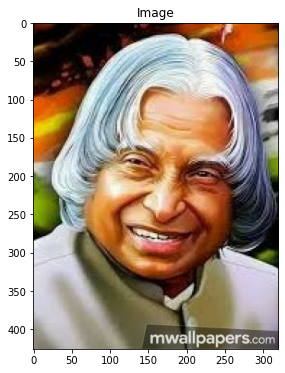

In [11]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
im=cv2.imread("images/apjabdul-kalam.jpg")
faceRects=detector(im,0)
print("Number of faces in the image = ",len(faceRects))

plt.imshow(im[:,:,::-1])
plt.title("Image")
plt.show()

In [8]:
points = fbc.getLandmarks(detector, predictor, im)
points=np.array(points)
im = np.float32(im)/255.0

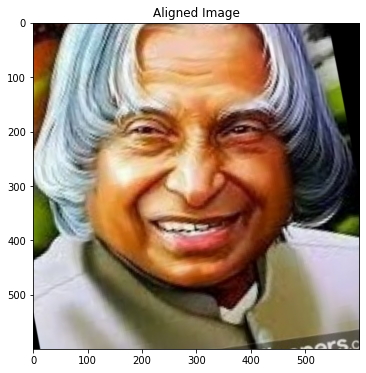

In [9]:
h=600
w=600
imNorm, points = fbc.normalizeImagesAndLandmarks((h,w), im, points)
imNorm = np.uint8(imNorm*255)
plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Image")
plt.show()